In [11]:
import time, os
from os import path
from PIL import Image
import ImageProcess as imgp
import time
from hyper import Hyper, CaptchaType

gov24_url = 'https://www.gov.kr/nlogin/captcha'
scourt_url = 'https://safind.scourt.go.kr/sf/captchaImg?t=image'
hyper = Hyper(captcha_type=CaptchaType.SUPREME_COURT, weights_only=True, quiet_out=False)

def getData(url):
    start_time = time.time()
    img = imgp.imageLoadFromUrl(url)
    img = imgp.setBGColor(img)
    img = img.crop((1, 1, img.width - 1, img.height - 1))
    # display(img)
    # print(img.size)
    time_stamp = int(time.time())
    down_path = f"download/supreme_court/{time_stamp}.png"
    file_name = down_path.split("/")[-1]
    img.save(down_path)
    pred = hyper.predict(down_path).replace("[UNK]", "_")
    end_time = time.time()
    p_time = f'{end_time - start_time:.4f}'
    save_path = down_path.replace(file_name, f"{pred}.png")
    os.rename(down_path, save_path)
    return pred, save_path, p_time

for i in range(496):
    hyper.quiet(False)
    pred, save_path, p_time = getData(scourt_url)
    print(f"#### << Done {i+1}/20 : pred = {pred}, p_time = {p_time}, save_path = {save_path} ####")
    hyper.quiet(True)

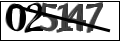

(121, 41)


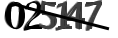

(118, 38)


In [13]:
from PIL import Image

img = Image.open("images/supreme_court/train/025147.png")
display(img)
print(img.size)
img = img.crop((1, 2, img.width - 2, img.height - 1))
display(img)
print(img.size)

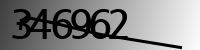

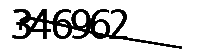

In [17]:
from PIL import Image
import requests
from io import BytesIO

url = "https://safind.scourt.go.kr/sf/captchaImg?t=image"
response = requests.get(url)
# 웹 이미지 로드
web_img = Image.open(BytesIO(response.content))
print(web_img.size, web_img.mode, web_img.format)
# display(web_img)
# 흑백 이미지로 변환
gray_img = web_img.convert("L")
# print(gray_img.size, gray_img.mode, gray_img.format)
# display(gray_img)
# 픽셀 데이터 로드
img = gray_img
pixel_data = img.load()
# 배경 밝기 임계값(그라데이션 배경 제거시 사용)
threshold = 64
# 그라데이션 배경 제거
for i in range(img.size[0]):
    for j in range(img.size[1]):
        p = pixel_data[i, j]
        if p >= threshold:
            img.putpixel((i, j), 255)
down_path = "captcha.png"
img.save(down_path)
display(web_img, img)

from hyper import CaptchaType, Hyper
import time

captcha_type = CaptchaType.GOV24
weights_only = True

hyper = Hyper(captcha_type=captcha_type, weights_only=weights_only, quiet_out=True)
pred = hyper.predict(down_path).replace("[UNK]", "_")
hyper.quiet(False)
print(pred)
time_stamp = int(time.time())
down_path = f"images/gov24/{time_stamp}.{pred}.png"
img.save(down_path)
print(down_path)

img.close()
